### 파일로딩 & 데이터 전처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 1) 소비자물가지수 데이터
total=pd.read_csv('소비자물가지수.csv')
total=total.iloc[:, 1:]
total=total.T

# 인덱스명 바꾸기
total=total.rename(index={'2019.1':'2019.10', '2020.1':'2020.10', '2021.1':'2021.10'})
total.rename(columns={0:'물가지수'}, inplace=True)

# 날짜 컬럼 인덱스 설정
D_list=total.index

# 날짜 컬럼 리스트로 전환
D_list=D_list.tolist()

# 물가지수 컬럼 리스트로 전환
num_list=total['물가지수'].tolist()


In [3]:
# 2) 코로나확진자수 데이터
corona=pd.read_excel('코로나확진자.xlsx', skiprows=4)
corona=corona.iloc[1:, 0:2]
corona['일자']=corona['일자'].astype('datetime64')

#'MONTH'컬럼 삽입
M=corona['일자'].dt.month
corona.insert(1, "MONTH", M)

#일자 컬럼 인덱스 설정 
corona.set_index('일자', inplace =True)

# 연도별 월별 평균값구하기
corona_2020=corona.loc['2020-01-20':'2020-12-31']
corona2020_group=corona_2020.groupby(by='MONTH')
mean2020=corona2020_group.mean()

corona_2021=corona.loc['2021-01-01':'2021-12-31']
corona2021_group=corona_2021.groupby(by='MONTH')
mean2021=corona2021_group.mean()

corona_2022=corona.loc['2022-01-01':'2022-06-30']
corona2022_group=corona_2022.groupby(by='MONTH')
mean2022=corona2022_group.mean()

corona_mean=pd.concat([mean2020, mean2021, mean2022], ignore_index=True)

# 구한 평균값 리스트로 전환
corona_mean_list=corona_mean['계(명)'].tolist()

In [4]:
# 3) 금리변동 데이터
interest_rate=pd.read_csv('금리.csv')
interest_rate=interest_rate.iloc[0]

interest_rate=pd.DataFrame(interest_rate)
interest_rate=interest_rate.fillna(method='ffill')

interest_rate.reset_index(inplace=True)
interest_rate=interest_rate.iloc[4:]

# 날짜 컬럼 설정
Date=pd.date_range('2019.01', '2022.07', freq='m')
interest_rate.insert(1, '날짜', Date)
interest_rate.drop(columns=['index'])
interest_rate_list=interest_rate[0].tolist()

In [5]:
#4) 유가변동 데이터
oil=pd.read_excel('유가가격현황.xlsx')
oil=oil.loc[::-1]
oil=oil.iloc[:, 0:2]

# 그룹화 위한 MONTH 컬럼 생성
M=oil['날짜'].dt.month
oil.insert(1, "MONTH", M)

# 날짜 컬럼 인덱스 설정
oil.set_index('날짜', inplace =True)

# 연도별 월별 평균값 구하기
oil_2019=oil.loc['2019-01-01':'2019-12-31']
oil2019_group=oil_2019.groupby(by='MONTH')
mean2019=oil2019_group.mean()

oil_2020=oil.loc['2020-01-01':'2020-12-31']
oil2020_group=oil_2020.groupby(by='MONTH')
mean2020=oil2020_group.mean()

oil_2021=oil.loc['2021-01-01':'2021-12-31']
oil2021_group=oil_2021.groupby(by='MONTH')
mean2021=oil2021_group.mean()

oil_2022=oil.loc['2022-01-01':'2022-06-30']
oil2022_group=oil_2022.groupby(by='MONTH')
mean2022=oil2022_group.mean()

oil_mean=pd.concat([mean2019, mean2020, mean2021, mean2022], ignore_index=True)

# 유가 컬럼 리스트 변환
oil_mean_list=oil_mean['종가'].tolist()

In [6]:
# 4) 해외동향 데이터
abroad=pd.read_csv('해외동향.csv')

abroad=abroad[abroad['항목별'].str.contains('소비자물가지수:총지수')]
abroad=abroad[(abroad['항목'].str.contains('중국'))|(abroad['항목'].str.contains('미국'))|(abroad['항목'].str.contains('영국'))]
abroad=abroad.iloc[:3, 1:]
abroad=abroad.set_index(['항목'])
abroad=abroad.drop(columns=['단위'])
abroad=abroad.T

abroad.reset_index(inplace=True)
abroad=abroad.fillna(method='ffill')
abroad['index']=abroad['index'].apply(lambda x : x.split(' ')[0])                        
abroad['index']=abroad['index'].astype('datetime64')
abroad=abroad.rename(columns={'index':'날짜'})

# 날짜, 국가별 리스트 생성
abroad_date_list=abroad['날짜'].tolist()
abroad_E_list=abroad['영국'].tolist()
abroad_A_list=abroad['미국'].tolist()
abroad_C_list=abroad['[비회원국]중국'].tolist()

### 그래프&상관계수

#### 1) 소비자물가총지수 - 코로나확진자

In [7]:
# 상관계수
num_series=pd.Series(num_list)
corona_series=pd.Series(np.log(corona_mean_list))
result1=pd.concat([num_series, corona_series], axis=1)
result1=result1.rename(columns={0:'소비자물가총지수', 1:'코로나확진자수'})
result1.corr()

,소비자물가총지수,코로나확진자수
소비자물가총지수,1.000000,0.862249
코로나확진자수,0.862249,1.000000


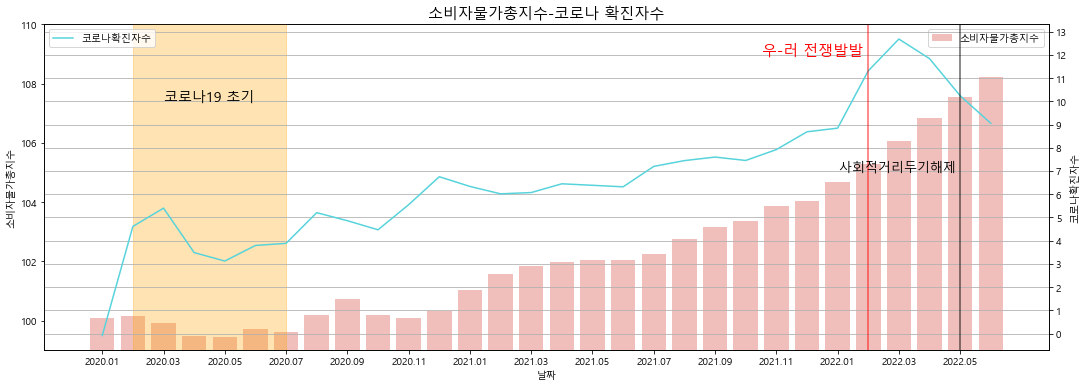

In [27]:
# 그래프
if platform.system() == "Windows":
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')
    
colors=sns.color_palette('hls',2)

# x축, y축 지정
x=D_list[12:]
y1=num_list[12:]
y2=np.log(corona_mean_list)

# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.bar(x, y1, label='소비자물가총지수',alpha=0.4, color=colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)

# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='코로나확진자수',color=colors[1])
ax2.set_ylabel('코로나확진자수')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-코로나 확진자수', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2)
plt.axvline(x=25, ymin=0, ymax=1.0, color='red', alpha=0.6)
plt.text(x=25, y=12, s='우-러 전쟁발발 ', fontsize=15, color='r', ha='right')
plt.axvline(x=28, ymin=0, ymax=1.0, color='black', alpha=0.6)
plt.text(x=28, y=7, s='사회적거리두기해제 ', fontsize=13, color='black', ha='right')
plt.axvspan(1, 6, color='orange', alpha=0.3)
plt.text(2,10,'코로나19 초기', fontsize=14)
plt.grid()
plt.show()

- 상관계수가 0.86으로 매우 높은 상관관계를 보임
- 코로나19가 시작된 초반에는 경제심리 위축과 사람들의 경제활동 급감으로 소비자물가총지수가 미세하게 하락하는 양상을 보였지만 2020.11월부터는 다시 계속 증가하는 추세를 보임 => 전세계적으로 코로나19가 심해짐에 따라 공급의 마비로 인한 것

#### 2) 소비자물가총지수 - 유가

In [9]:
# 상관계수
oil_mean_series=pd.Series(oil_mean_list)
result3=pd.concat([num_series, oil_mean_series], axis=1)
result3=result3.rename(columns={0:'소비자물가총지수', 1:'유가변동'})
result3.corr()

,소비자물가총지수,유가변동
소비자물가총지수,1.00000,0.87839
유가변동,0.87839,1.00000


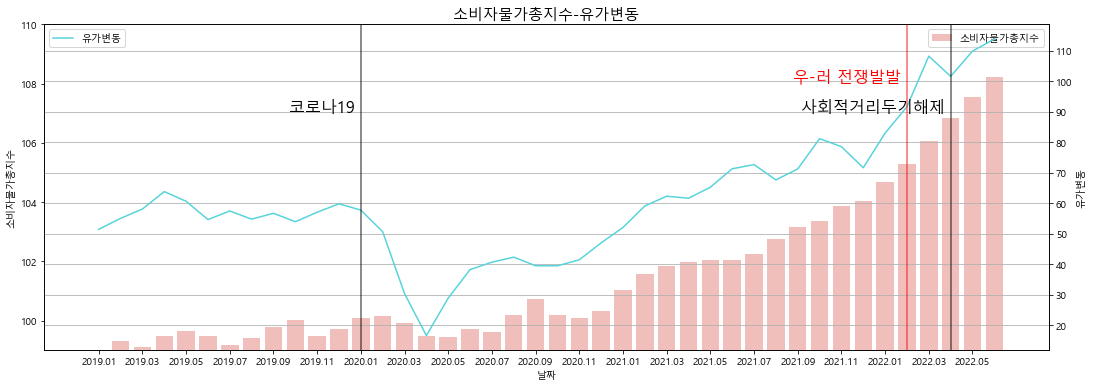

In [18]:
# x축, y축 지정
x=D_list
y1=num_list
y2=oil_mean_list

colors=sns.color_palette('hls',2)
# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))

ax1.bar(x, y1, label='소비자물가총지수', alpha=0.4, color = colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)

# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='유가변동', color=colors[1])
ax2.set_ylabel('유가변동')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-유가변동', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2) 
plt.axvline(x=37, ymin=0, ymax=1.0, color='red', alpha=0.6)
plt.text(x=37, y=100, s='우-러 전쟁발발 ', fontsize=16, color='r', ha='right')
plt.axvline(x=12, ymin=0, ymax=1.0, color='black', alpha=0.6)
plt.text(x=12, y=90, s='코로나19 ', fontsize=16, color='black', ha='right')
plt.axvline(x=39, ymin=0, ymax=1.0, color='black', alpha=0.6)
plt.text(x=39, y=90, s='사회적거리두기해제 ', fontsize=16, color='black', ha='right')
plt.grid()
plt.show()

- 2020년 1월 코로나 확산의 시작으로 인해 야외활동 관련 소비활동이 급감함에 따라 유가 하락
- 그러나 코로나19가 전세계적으로 심해지면서 공급의 마비가 심화돼 유가가 다시 증가
- 코로나19 확산 + 전쟁 발발로인해 유가는 더 급증하기 시작 ==> 소비자물가총지수 증가
- 22년 4월부터 사회적 거리두기 해제로 인해 야외활동 관련 소비활동이 다시 활발해져 유가 증가

#### 3) 소비자물가총지수 - 금리

In [12]:
# 상관계수
interest_rate_series=pd.Series(interest_rate_list)
result2=pd.concat([num_series, interest_rate_series], axis=1)
result2=result2.rename(columns={0:'소비자물가총지수', 1:'금리변동'})
result2.corr()

,소비자물가총지수,금리변동
소비자물가총지수,1.000000,0.092986
금리변동,0.092986,1.000000


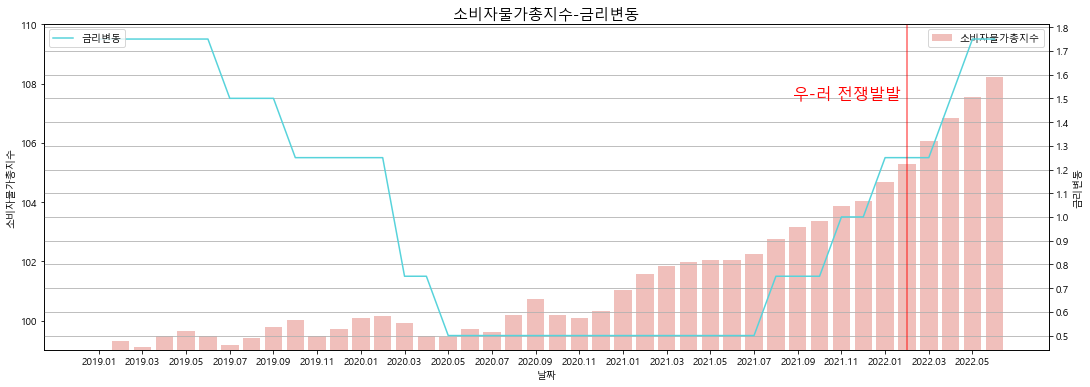

In [19]:
# 그래프
# x축, y축 지정
x=D_list
y1=num_list
y2=interest_rate_list

colors=sns.color_palette('hls',2)
# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.bar(x, y1, label='소비자물가총지수', alpha=0.4, color=colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)
# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='금리변동', color=colors[1])
ax2.set_ylabel('금리변동')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-금리변동', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2)
plt.axvline(x=37, ymin=0, ymax=1.0, color='red', alpha=0.6)
plt.text(x=37, y=1.5, s='우-러 전쟁발발 ', fontsize=16, color='r', ha='right')
plt.grid()
plt.show()

- 2020.5월 전에는 반대의 양상, 후에는 비슷한 양상을 보이고 있어 상관계수가 0에 가깝게 나옴
- 금리는 물가를 반영해 조정이 되므로 둘 사이의 정확한 상관관계의 분석이 어려움

#### 4) 해외동향 분석

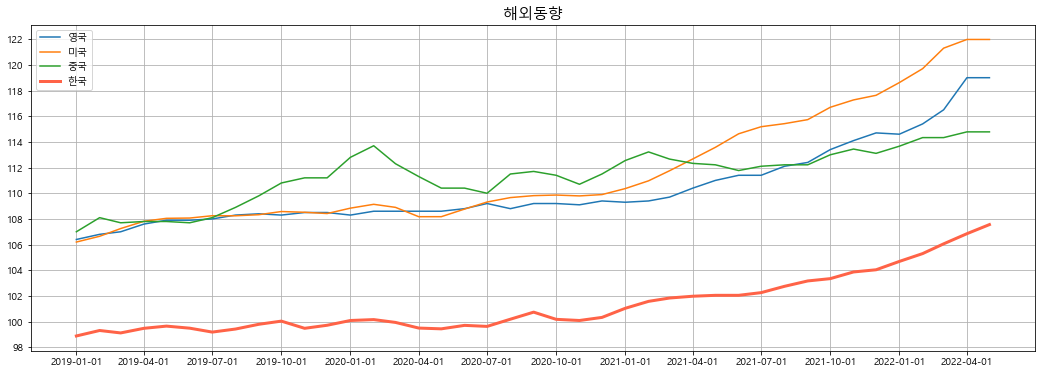

In [14]:
# x축, y축 지정
x=abroad_date_list
y1=abroad_E_list
y2=abroad_A_list
y3=abroad_C_list
y4=num_list[:-1]

plt.figure(figsize=(18,6))
plt.plot(x,y1, x,y2, x,y3)

line=plt.plot(x,y4)

plt.setp(line,'color', 'tomato', 'linewidth', 3.0)
plt.xticks(x)
plt.locator_params(nbins=len(x)/3)
plt.title('해외동향', fontsize=15)
plt.legend(['영국', '미국', '중국', '한국'])
plt.grid()
plt.show()

- 해외 또한 국내와 비슷한 양상을 보임


#### 결과  
- 코로나와 유가 모두 소비자물가총지수에 큰 영향을 미침
- 따라서 물가의 지속적인 상승은 여러 복합적 원인에 기인하는 것으로 보이는데 더욱이 최근 전세계적으로 코로나19와 전쟁이라는 특수한 상황으로 인해 향후 어떤 추세를 보일지에 대한 예상은 더욱 어려워짐
- 향후 추세를 조금이라도 예상해보기 위해 저희 조는 여러 요소들을 지출목적별, 품목별, 성질별로 분류해 최근 특수 상황들과 소비자물가지수들간의 상관관계에 대해 분석해보았습니다. 